In [41]:
## Importing libraries
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import KFold, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, explained_variance_score, roc_curve, roc_auc_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings('ignore')

In [353]:
## Dataset Import
df_heart = pd.read_csv('./heart_cleveland_upload.csv')
start_number_rows = len(df_heart)

In [145]:
df_heart.info()
# age: age in years
# sex: sex (1 = male; 0 = female)
# cp: chest pain type
# -- Value 0: typical angina
# -- Value 1: atypical angina
# -- Value 2: non-anginal pain
# -- Value 3: asymptomatic
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# chol: serum cholestoral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach: maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# -- Value 0: upsloping
# -- Value 1: flat
# -- Value 2: downsloping
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# and the label
# condition: 0 = no disease, 1 = disease

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [48]:
df_heart.describe([.05, .95])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,40.000000,0.000000,0.000000,108.000000,175.800000,0.000000,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
95%,68.000000,1.000000,3.000000,160.800000,327.600000,1.000000,2.000000,182.000000,1.000000,3.400000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [74]:
pp.ProfileReport(df_heart)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:
- we have a lot more men than women in our dataset, this could suggest a bias when collected the data.
- People with heart diase is almost as frequent as peolple without the diase in our dataset. We can further analise the peformance on our models with ROC. 

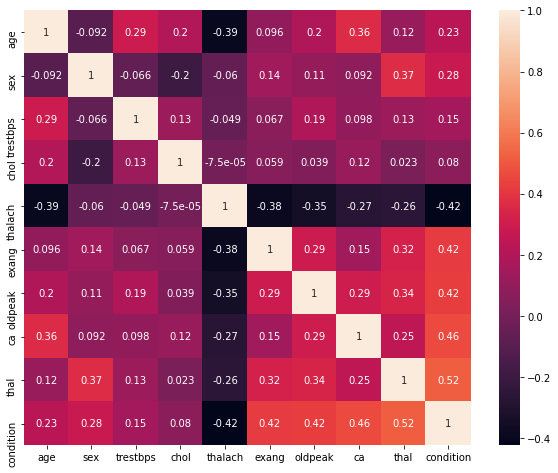

In [304]:
corr_matrix = df_heart.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Numerical Variables Analysis

Observations:
- Our dataset have few data points which is translated into a volatile plot, for example from age of 71 to 76 there is no occurrence of heart diases mostly caused by few inputs (5) in this range. For this reason, it could make sense to group some of this values into ranges to enhance predictions (after all must not have a great difference between someone with age of 29 from someone of 30).


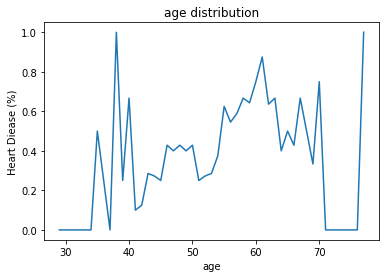

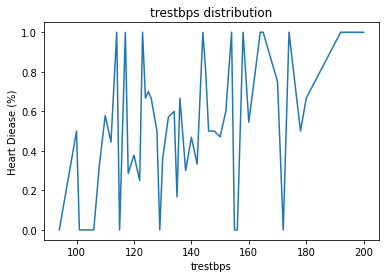

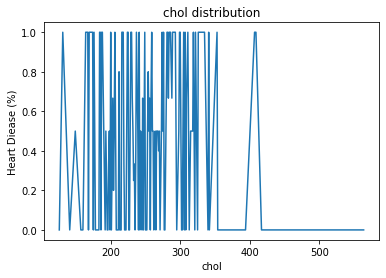

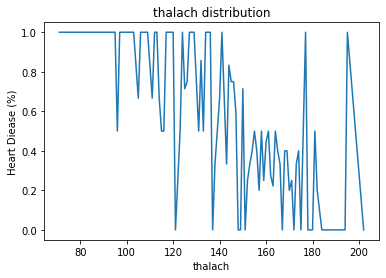

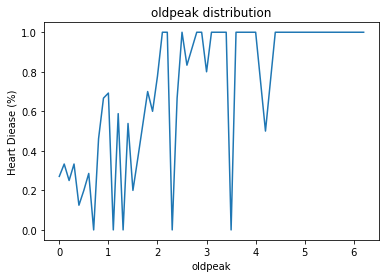

In [354]:
categorical_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for category in categorical_variables:
    df_have_condition = df_heart[[category, 'condition']].groupby([category], as_index=False).agg(['sum', 'count']).reset_index()
#     print(df_have_condition.head())
#     print(df_have_condition)
    plt.figure(figsize=(6, 4))
    plt.title(f'{category} distribution')
    plt.xlabel(category)
    plt.ylabel('Heart Diease (%)')
    plt.plot(df_have_condition[category], df_have_condition['condition']['sum']/df_have_condition['condition']['count'])
    plt.show()

### Grouping numerical data into range

Observations:
- By grouping the data we can now see a clear tendecy in each variable.
- It's worth mentioning that each cutoff was chosen arbitrarily.  

In [363]:
bins = [19, 39, 49, 59, 69, 120]
labels = [19, 39, 49, 59, 69]
df_heart['age_range'] = pd.cut(df_heart.age, bins, labels = labels)
df_heart['age_range'] = pd.to_numeric(df_heart['age_range'])

bins = range(90, 700, 10)
labels = range(90, 690, 10)
df_heart['chol_range'] = pd.cut(df_heart.chol, bins, labels = labels)
df_heart['chol_range'] = pd.to_numeric(df_heart['chol_range'])

bins = range(90, 210, 10)
labels = range(100, 210, 10)
df_heart['trestbps_range'] = pd.cut(df_heart.trestbps, bins, labels = labels)
df_heart['trestbps_range'] = pd.to_numeric(df_heart['trestbps_range'])

bins = range(70, 210, 5)
labels = range(75, 210, 5)
df_heart['thalach_range'] = pd.cut(df_heart.thalach, bins, labels = labels)
df_heart['thalach_range'] = pd.to_numeric(df_heart['thalach_range'])

bins = [-np.inf, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 7.0]
labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
df_heart['oldpeak_range'] = pd.cut(df_heart.oldpeak, bins, labels = labels)
df_heart['oldpeak_range'] = pd.to_numeric(df_heart['oldpeak_range'])
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             297 non-null    int64  
 1   sex             297 non-null    int64  
 2   cp              297 non-null    int64  
 3   trestbps        297 non-null    int64  
 4   chol            297 non-null    int64  
 5   fbs             297 non-null    int64  
 6   restecg         297 non-null    int64  
 7   thalach         297 non-null    int64  
 8   exang           297 non-null    int64  
 9   oldpeak         297 non-null    float64
 10  slope           297 non-null    int64  
 11  ca              297 non-null    int64  
 12  thal            297 non-null    int64  
 13  condition       297 non-null    int64  
 14  age_range       297 non-null    int64  
 15  chol_range      297 non-null    int64  
 16  trestbps_range  297 non-null    int64  
 17  thalach_range   297 non-null    int

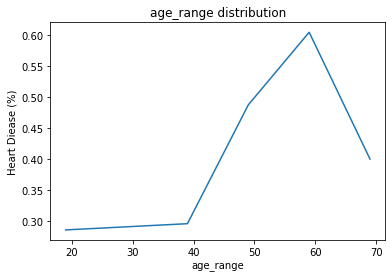

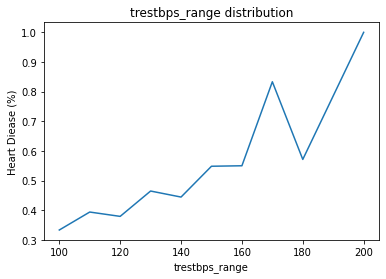

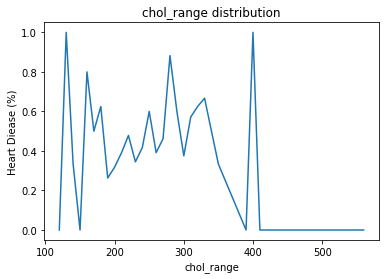

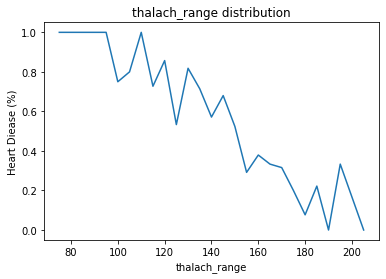

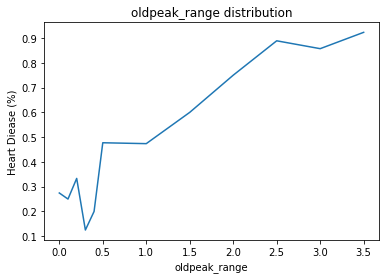

In [364]:
categorical_variables = ['age_range', 'trestbps_range', 'chol_range', 'thalach_range', 'oldpeak_range']

for category in categorical_variables:
    df_have_condition = df_heart[[category, 'condition']].groupby([category], as_index=False).agg(['sum', 'count']).reset_index()
#     print(df_have_condition.head())
#     print(df_have_condition)
    plt.figure(figsize=(6, 4))
    plt.title(f'{category} distribution')
    plt.xlabel(category)
    plt.ylabel('Heart Diease (%)')
    plt.plot(df_have_condition[category], df_have_condition['condition']['sum']/df_have_condition['condition']['count'])
    plt.show()

## Categorical Variables Analysis

Observations:
- Males are more likely to have a heart disease than females. Altough, being a male gives almost a toss coin for the heart diase. Furthermore, we can keep this feature as it is, since we have only two categories. 
- Chest pain doesn't seems to be ordinal keep this in mind to apply One Hot Encoder.
- Fast blood sugar don't have correlation with heart diease.
- Resting electrocardiographic results doesn't seems to be ordinal as it is. Keep this in mind to apply One Hot Encoder.
- Exercise induced angina can be left as it is.
- Slope distribution isn't ordinal doesn't seems to be ordinal as it is. Keep this in mind to apply One Hot Encoder.
- Number of major vessels and the blood disorder 'Thalassemia' seems to have some order. I going to left this features as it is and understand a little better the meaning of this features to be sure if it is ordinal.

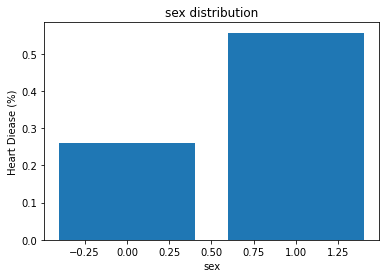

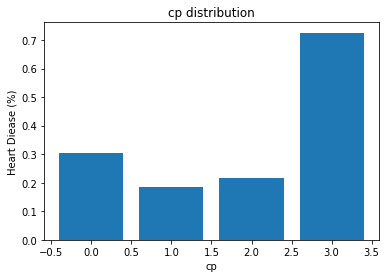

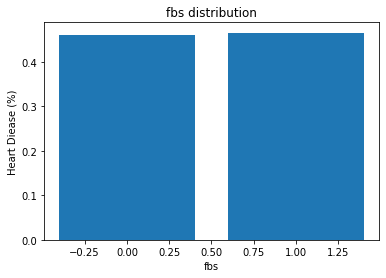

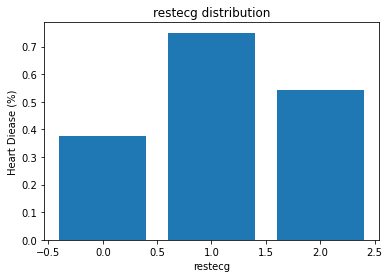

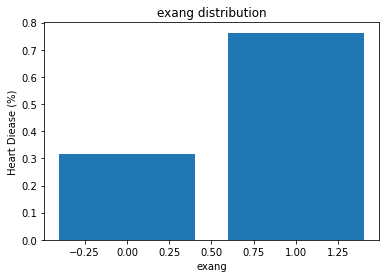

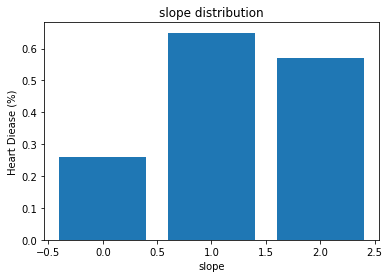

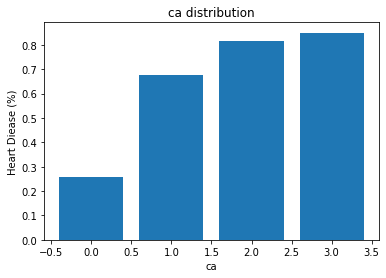

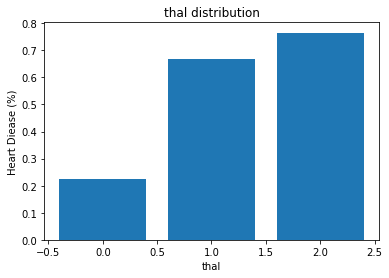

In [358]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for category in categorical_variables:
    df_have_condition = df_heart[[category, 'condition']].groupby([category], as_index=False).agg(['sum', 'count']).reset_index()
#     print(df_have_condition.head())
#     print(df_have_condition)
    plt.figure(figsize=(6, 4))
    plt.title(f'{category} distribution')
    plt.xlabel(category)
    plt.ylabel('Heart Diease (%)')
    plt.bar(df_have_condition[category], df_have_condition['condition']['sum']/df_have_condition['condition']['count'])
    plt.show()

# Feature Engineering

In [365]:
df_features = df_heart

df_features['chest_pain'] = df_heart['cp'].map({0:'typical_anginal', 1:'atypical_anginal', 2:'non_anginal_pain', 3:'asymptomatic' })
df_features['resting_ecg'] = df_heart['restecg'].map({0:'normal', 1:'abnormality', 2:'hypertrophy' })
df_features['slope'] = df_heart['slope'].map({0:'upsloping', 1:'flat', 2:'downsloping' })

df_features.drop(columns=['cp', 'restecg', 'fbs'], inplace=True)

df_features.head(5)

,age,sex,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,condition,age_range,chol_range,trestbps_range,thalach_range,oldpeak_range,chest_pain,resting_ecg
0,69,1,160,234,131,0,0.1,flat,1,0,0,59,230,160,135,0.0,typical_anginal,hypertrophy
1,69,0,140,239,151,0,1.8,upsloping,2,0,0,59,230,140,155,1.5,typical_anginal,normal
2,66,0,150,226,114,0,2.6,downsloping,0,0,0,59,220,150,115,2.5,typical_anginal,normal
3,65,1,138,282,174,0,1.4,flat,1,0,1,59,280,140,175,1.0,typical_anginal,hypertrophy
4,64,1,110,211,144,1,1.8,flat,0,0,0,59,210,110,145,1.5,typical_anginal,hypertrophy


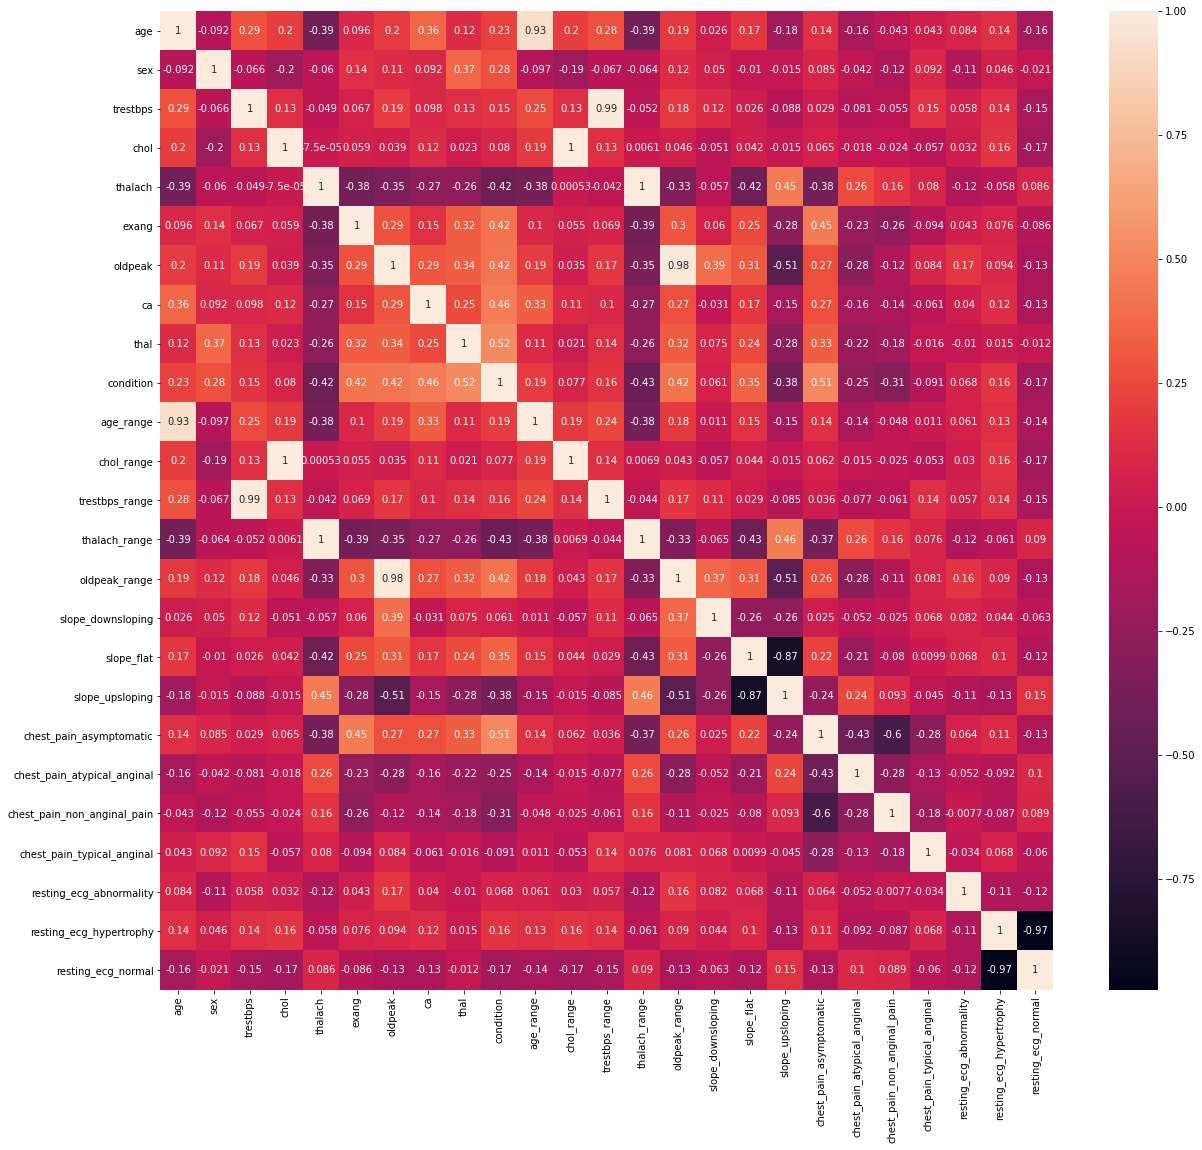

In [366]:
df_features = pd.get_dummies(df_features)

corr_matrix = df_features.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True)
plt.show()

From this new correlation matrix we can see a high correlation between resting ecg with hypertrophy and normal; and between slope flat and uplopping.
I'll drop one feature for each high correlationated pair and keep the one with the highest correlation with the condition.

In [367]:
df_features = df_features.drop(columns=['resting_ecg_hypertrophy', 'slope_flat', 'chol', 'age', 'trestbps', 'thalach', 'oldpeak'])
df_features.head(5)

,sex,exang,ca,thal,condition,age_range,chol_range,trestbps_range,thalach_range,oldpeak_range,slope_downsloping,slope_upsloping,chest_pain_asymptomatic,chest_pain_atypical_anginal,chest_pain_non_anginal_pain,chest_pain_typical_anginal,resting_ecg_abnormality,resting_ecg_normal
0,1,0,1,0,0,59,230,160,135,0.0,0,0,0,0,0,1,0,0
1,0,0,2,0,0,59,230,140,155,1.5,0,1,0,0,0,1,0,1
2,0,0,0,0,0,59,220,150,115,2.5,1,0,0,0,0,1,0,1
3,1,0,1,0,1,59,280,140,175,1.0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,59,210,110,145,1.5,0,0,0,0,0,1,0,0


# Preprocessing

In [368]:
X = df_features.drop(columns='condition')
Y = df_features['condition']

# Usually between 5 and 10. Train 0.8, test 0.2
kf = KFold(n_splits = 5)

folds = kf.split(X)

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Modelling

- Logistic Regression
- Naive Bayes
- Neural Network
- k-Nearest Neighbors algorithm
- Support Vector Machines
- MLP Classifier
- AdaBoost Classifier
- XGBoost Classifire

In [45]:
metrics = {
    "lr": {
        "name": "Logistic Regression",
        "fpr": None,
        "tpr": None,
        "auc": None,
        "thresholds": None,
        "y_real": None,
        "y_pred": None
    },
    "ada": {
        "name": "Ada",
        "fpr": None,
        "tpr": None,
        "auc": None,
        "thresholds": None,
        "y_real": None,
        "y_pred": None
    },
    "knn": {
        "name": "KNN",
        "fpr": None,
        "tpr": None,
        "auc": None,
        "thresholds": None,
        "y_real": None,
        "y_pred": None
    },
    "svm": {
        "name": "SVM",
        "fpr": None,
        "tpr": None,
        "auc": None,
        "thresholds": None,
        "y_real": None,
        "y_pred": None
    },
    "nn": {
        "name": "Neural Network",
        "fpr": None,
        "tpr": None,
        "auc": None,
        "thresholds": None,
        "y_real": None,
        "y_pred": None
    },
}


In [8]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    axes[0].set_title(title)
    if ylim is not None:
        axes[3].set_ylim(*ylim)
    
    scores = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error', 'accuracy']
    label_scores = ['R2', 'Mean Square Error', 'Mean Absolute Error', 'Accuracy']
    for index in range(len(scores)):
        axes[index].set_xlabel("Training examples")
        axes[index].set_ylabel(label_scores[index])
    
        kf = KFold(n_splits = 5)

        cv = kf.split(X)
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       scoring=scores[index],
                       return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        axes[index].grid()
        axes[index].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color='r')
        axes[index].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color='g')
        axes[index].plot(train_sizes, train_scores_mean, 'o-', color='r',
                 label="Training score")
        axes[index].plot(train_sizes, test_scores_mean, 'o-', color='g',
                 label="Cross-validation score")
        axes[index].legend(loc="best")
        
    # Plot n_samples vs fit_times
    axes[4].grid()
    axes[4].plot(train_sizes, fit_times_mean, 'o-')
    axes[4].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[4].set_xlabel("Training examples")
    axes[4].set_ylabel("fit_times")
    axes[4].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[5].grid()
    axes[5].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[5].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[5].set_xlabel("fit_times")
    axes[5].set_ylabel("Score")
    axes[5].set_title("Performance of the model")

    return plt

### Logistic Regression

In [397]:
lr = LogisticRegression()

kf = KFold(n_splits = 5)

folds = kf.split(X)

r2 = []
mae = []
mse = []
acc = []

metrics_lr = metrics['lr']

for train_index, test_index in folds:
    lr.fit(X.loc[train_index], Y.loc[train_index])
    Y_pred = lr.predict(X.loc[test_index])
    Y_prob = lr.predict_proba(X.loc[test_index])[:, 1]
    
    metrics_lr['y_real'] = Y.loc[test_index]
    metrics_lr['y_pred'] = Y_prob
    
    # metrics
    r2.append(r2_score(Y.loc[test_index], Y_pred))
    mae.append(mean_absolute_error(Y.loc[test_index], Y_pred))
    mse.append(mean_squared_error(Y.loc[test_index], Y_pred))
    acc.append(accuracy_score(Y.loc[test_index], Y_pred))
    
    # ROC
    metrics_lr['fpr'], metrics_lr['tpr'], metrics_lr['thresholds'] = roc_curve(Y.loc[test_index], Y_prob)
    metrics_lr['auc'] = roc_auc_score(Y.loc[test_index], Y_prob)
    
    metrics_lr['fpr'], metrics_lr['tpr'], metrics_lr['thresholds'] = roc_curve(Y, lr.predict_proba(X)[:, 1])
    metrics_lr['auc'] = roc_auc_score(Y, lr.predict_proba(X)[:, 1])

print(f'''Metrics: 
        Squared Error: {np.mean(r2)}, std: {np.std(r2)}, 
        Mean Absolute Error {np.mean(mae)}, std: {np.std(mae)},
        Mean Squared Error: {np.mean(mse)}, std: {np.std(mse)},
        Accuracy: {np.mean(acc)}, std: {np.std(acc)}''')

Metrics: 
        Squared Error: 0.1348844669701334, std: 0.3703749257993052, 
        Mean Absolute Error 0.16474576271186442, std: 0.06976300835041016,
        Mean Squared Error: 0.16474576271186442, std: 0.06976300835041016,
        Accuracy: 0.8352542372881355, std: 0.06976300835041017


### Ada Boosting Classifier

In [398]:
ada = AdaBoostClassifier(learning_rate=0.1)

kf = KFold(n_splits = 5)

folds = kf.split(X)

r2 = []
mae = []
mse = []
acc = []

metrics_ada = metrics['ada']

for train_index, test_index in folds:
    ada.fit(X.loc[train_index], Y.loc[train_index])
    Y_pred = ada.predict(X.loc[test_index])
    Y_prob = ada.predict_proba(X.loc[test_index])[:, 1]
    
    metrics_ada['y_real'] = Y.loc[test_index]
    metrics_ada['y_pred'] = Y_prob
    
    # metrics
    r2.append(r2_score(Y.loc[test_index], Y_pred))
    mae.append(mean_absolute_error(Y.loc[test_index], Y_pred))
    mse.append(mean_squared_error(Y.loc[test_index], Y_pred))
    acc.append(accuracy_score(Y.loc[test_index], Y_pred))
    
    # ROC
    metrics_ada['fpr'], metrics_ada['tpr'], metrics_ada['thresholds'] = roc_curve(Y.loc[test_index], Y_prob)
    metrics_ada['auc'] = roc_auc_score(Y.loc[test_index], Y_prob)
    
    metrics_ada['fpr'], metrics_ada['tpr'], metrics_ada['thresholds'] = roc_curve(Y, ada.predict_proba(X)[:, 1])
    metrics_ada['auc'] = roc_auc_score(Y, ada.predict_proba(X)[:, 1])

print(f'''Metrics: 
        Squared Error: {np.mean(r2)}, std: {np.std(r2)}, 
        Mean Absolute Error {np.mean(mae)}, std: {np.std(mae)},
        Mean Squared Error: {np.mean(mse)}, std: {np.std(mse)},
        Accuracy: {np.mean(acc)}, std: {np.std(acc)}''')

Metrics: 
        Squared Error: 0.17609724541975394, std: 0.29802748020980996, 
        Mean Absolute Error 0.15485875706214686, std: 0.046621090999177495,
        Mean Squared Error: 0.15485875706214686, std: 0.046621090999177495,
        Accuracy: 0.8451412429378531, std: 0.04662109099917751


### KNN

In [403]:
knn = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits = 5)

folds = kf.split(X)

r2 = []
mae = []
mse = []
acc = []

metrics_knn = metrics['knn']
for train_index, test_index in folds:
    knn.fit(X.loc[train_index], Y.loc[train_index])
    Y_pred = knn.predict(X.loc[test_index])
    Y_prob = knn.predict_proba(X.loc[test_index])[:, 1]
    
    metrics_knn['y_real'] = Y.loc[test_index]
    metrics_knn['y_pred'] = Y_prob
    
    # metrics
    r2.append(r2_score(Y.loc[test_index], Y_pred))
    mae.append(mean_absolute_error(Y.loc[test_index], Y_pred))
    mse.append(mean_squared_error(Y.loc[test_index], Y_pred))
    acc.append(accuracy_score(Y.loc[test_index], Y_pred))

    # ROC
    metrics_knn['fpr'], metrics_knn['tpr'], metrics_knn['thresholds'] = roc_curve(Y.loc[test_index], Y_prob)
    metrics_knn['auc'] = roc_auc_score(Y.loc[test_index], Y_prob)
    
    metrics_knn['fpr'], metrics_knn['tpr'], metrics_knn['thresholds'] = roc_curve(Y, knn.predict_proba(X)[:, 1])
    metrics_knn['auc'] = roc_auc_score(Y, knn.predict_proba(X)[:, 1])
    
print(f'''Metrics: 
        Squared Error: {np.mean(r2)}, std: {np.std(r2)}, 
        Mean Absolute Error {np.mean(mae)}, std: {np.std(mae)},
        Mean Squared Error: {np.mean(mse)}, std: {np.std(mse)},
        Accuracy: {np.mean(acc)}, std: {np.std(acc)}''')

Metrics: 
        Squared Error: -0.019642847820339294, std: 0.40351539352618726, 
        Mean Absolute Error 0.19192090395480227, std: 0.06303970903782337,
        Mean Squared Error: 0.19192090395480227, std: 0.06303970903782337,
        Accuracy: 0.8080790960451978, std: 0.06303970903782338


### Support Vector Machine

In [405]:
svc = SVC(probability = True)

kf = KFold(n_splits = 5)

folds = kf.split(X)

r2 = []
mae = []
mse = []
acc = []

metrics_svm = metrics['svm']
for train_index, test_index in folds:
    svc.fit(X.loc[train_index], Y.loc[train_index])
    Y_pred = svc.predict(X.loc[test_index])
    Y_prob = svc.predict_proba(X.loc[test_index])[:, 1]
    
    metrics_svm['y_real'] = Y.loc[test_index]
    metrics_svm['y_pred'] = Y_prob
    
    # metrics
    r2.append(r2_score(Y.loc[test_index], Y_pred))
    mae.append(mean_absolute_error(Y.loc[test_index], Y_pred))
    mse.append(mean_squared_error(Y.loc[test_index], Y_pred))
    acc.append(accuracy_score(Y.loc[test_index], Y_pred))
    
    # ROC
    metrics_svm['fpr'], metrics_svm['tpr'], metrics_svm['thresholds'] = roc_curve(Y.loc[test_index], Y_prob)
    metrics_svm['auc'] = roc_auc_score(Y.loc[test_index], Y_prob)
    
    metrics_svm['fpr'], metrics_svm['tpr'], metrics_svm['thresholds'] = roc_curve(Y, svc.predict_proba(X)[:, 1])
    metrics_svm['auc'] = roc_auc_score(Y, svc.predict_proba(X)[:, 1])

print(f'''Metrics: 
        Squared Error: {np.mean(r2)}, std: {np.std(r2)}, 
        Mean Absolute Error {np.mean(mae)}, std: {np.std(mae)},
        Mean Squared Error: {np.mean(mse)}, std: {np.std(mse)},
        Accuracy: {np.mean(acc)}, std: {np.std(acc)}''')

Metrics: 
        Squared Error: 0.03950509643398796, std: 0.2866784939288017, 
        Mean Absolute Error 0.18180790960451979, std: 0.0439606839630049,
        Mean Squared Error: 0.18180790960451979, std: 0.0439606839630049,
        Accuracy: 0.8181920903954802, std: 0.0439606839630049


### Neural Network

In [401]:
kf = KFold(n_splits = 5)

folds = kf.split(X)

r2 = []
mae = []
mse = []
acc = []

metrics_nn = metrics['nn']

def nn_model(input_size, learning_rate):
    model = Sequential([
        Input(shape=(input_size,)),
        Dense(units=32, kernel_initializer='he_normal', activation='relu'),
        Dense(units=1, kernel_initializer='he_normal', activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['mae', 'mse', 'accuracy'])

    return model

for train_index, test_index in folds:
    nn = nn_model(X.shape[1], 0.0001)
    nn.fit(X.loc[train_index], Y.loc[train_index], batch_size=16, epochs=200, verbose=0)
    Y_pred = nn.predict(X.loc[test_index])
    r2.append(r2_score(Y.loc[test_index], Y_pred))
    mae.append(mean_absolute_error(Y.loc[test_index], Y_pred))
    mse.append(mean_squared_error(Y.loc[test_index], Y_pred))
    acc.append(accuracy_score(Y.loc[test_index], Y_pred > 0.5))
    
    metrics_nn['y_real'] = Y.loc[test_index]
    metrics_nn['y_pred'] = Y_pred
    
    # ROC
    metrics_nn['fpr'], metrics_nn['tpr'], metrics_nn['thresholds'] = roc_curve(Y.loc[test_index], Y_pred)
    metrics_nn['auc'] = roc_auc_score(Y.loc[test_index], Y_pred)
    
    metrics_nn['fpr'], metrics_nn['tpr'], metrics_nn['thresholds'] = roc_curve(Y, nn.predict(X))
    metrics_nn['auc'] = roc_auc_score(Y, nn.predict(X))

print(f'''Metrics: 
        Squared Error: {np.mean(r2)}, std: {np.std(r2)}, 
        Mean Absolute Error {np.mean(mae)}, std: {np.std(mae)},
        Mean Squared Error: {np.mean(mse)}, std: {np.std(mse)},
        Accuracy: {np.mean(acc)}, std: {np.std(acc)}''')

Metrics: 
        Squared Error: 0.3207716396612029, std: 0.16022389154908978, 
        Mean Absolute Error 0.27872580983881223, std: 0.028576839670131377,
        Mean Squared Error: 0.13029522245570985, std: 0.03166859884354274,
        Accuracy: 0.8285310734463277, std: 0.06902928345195253


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

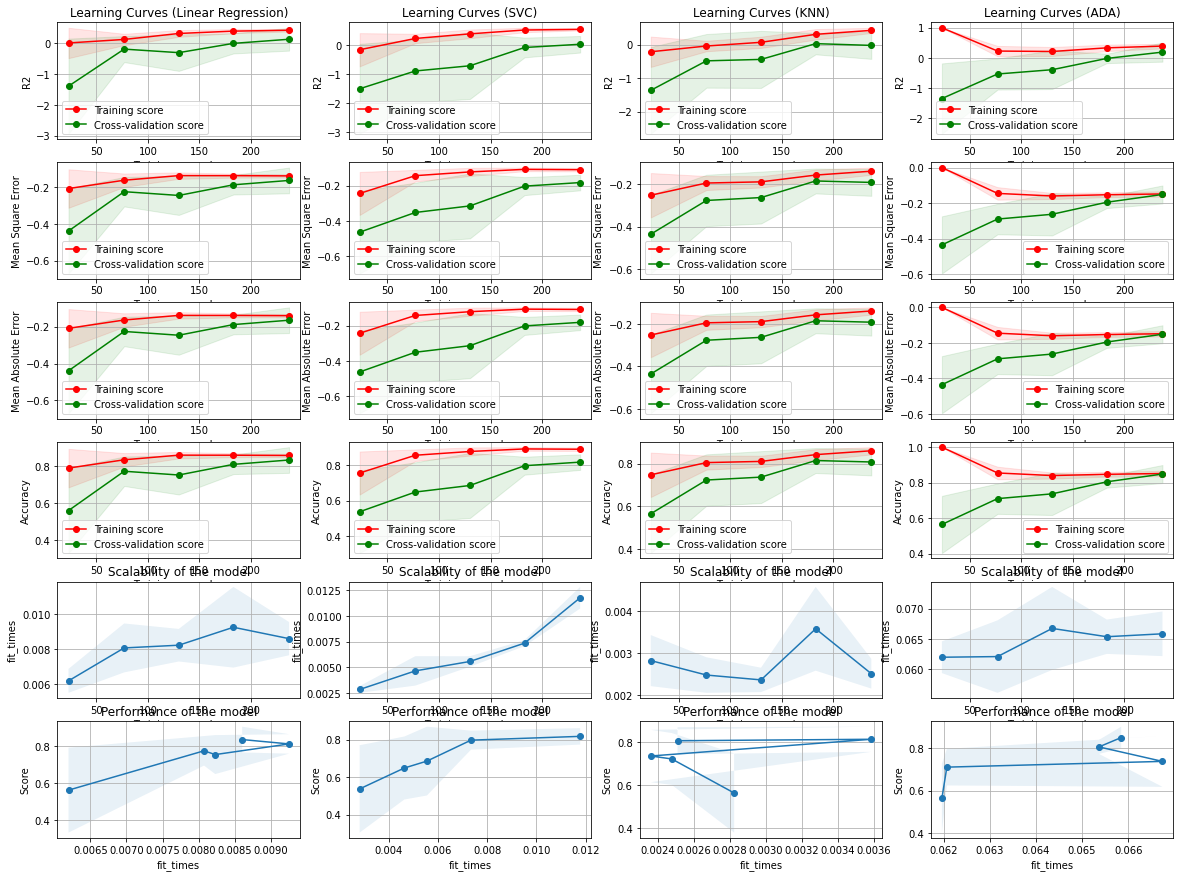

In [375]:
fig, axes = plt.subplots(6, 4, figsize=(20, 15))

plot_learning_curve(lr, 'Learning Curves (Linear Regression)', X, Y, axes=axes[:, 0],
                    cv=folds, n_jobs=4)

plot_learning_curve(svc, 'Learning Curves (SVC)', X, Y, axes=axes[:, 1],
                    cv=folds, n_jobs=4)

plot_learning_curve(knn, 'Learning Curves (KNN)', X, Y, axes=axes[:, 2],
                    cv=folds, n_jobs=4)

plot_learning_curve(ada, 'Learning Curves (ADA)', X, Y, axes=axes[:, 3],
                    cv=folds, n_jobs=4)

In [406]:
fig = go.Figure()

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for algorithm in metrics.values():
    auc = algorithm['auc']
    name = algorithm['name']
    fig.add_trace(go.Scatter(x=algorithm['fpr'], y=algorithm['tpr'], name=f'{name} (AUC={auc:.2f})', mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
#     yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain')
)
fig.show()

Observations:
- ADA outperformed the other algorithms in False positive Rate (0.2) when fixed the True Positive Rate at 1. I'd chose this algorithm to predict heart diease since all real positive cases were predicted correctly, therefore no pacient with the diase was incorrectly categorize. Furthermore, it was the algorithm with least error of predicting pacients with the diease that actually don't have the condition, what could potencially reduce medical costs.
- Neural Network outperfomed the other algorithms in True Positive Rate (0.46) when the False Positive Rate is fixed at 0. I'd chose this algorithm with was really important to have a high accuracy at correctly predict people which don't have the condition.

Logistic Regression
Ada
KNN
SVM
Neural Network


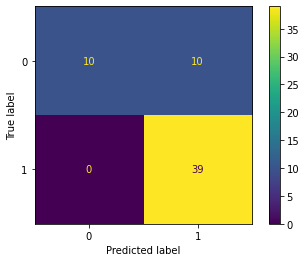

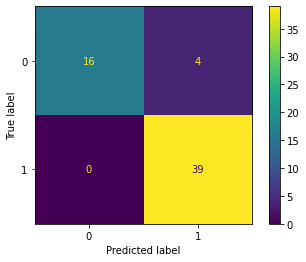

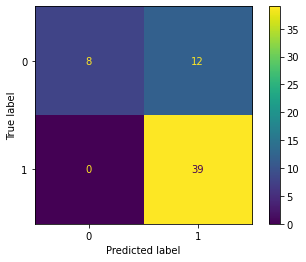

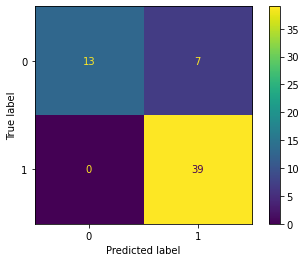

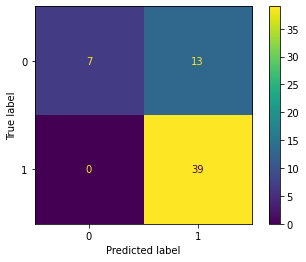

In [376]:
for algorithm in metrics.values():
    index = next(index for index, x in enumerate(algorithm['tpr']) if x == 1.0)
    print(algorithm['name'])
    cm = confusion_matrix(algorithm['y_real'], algorithm['y_pred'] >= algorithm['thresholds'][index])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

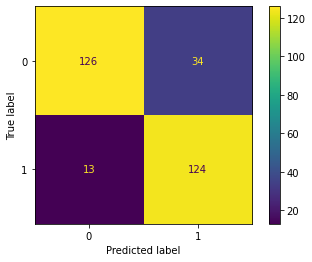

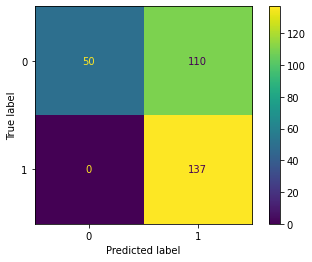

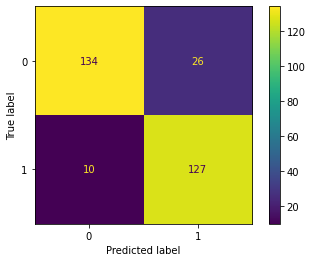

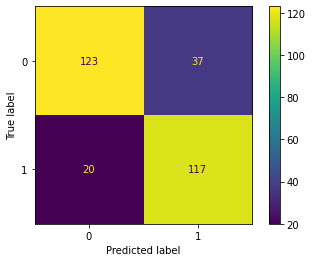

In [392]:
index = next(index for index, x in enumerate(metrics['lr']['tpr']) if x == 1.0)
cm = confusion_matrix(Y, lr.predict_proba(X)[:, 1] >= metrics['lr']['thresholds'][index])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

index = next(index for index, x in enumerate(metrics['ada']['tpr']) if x == 1.0)
cm = confusion_matrix(Y, ada.predict_proba(X)[:, 1] >= metrics['ada']['thresholds'][index])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

index = next(index for index, x in enumerate(metrics['svm']['tpr']) if x == 1.0)
cm = confusion_matrix(Y, svc.predict_proba(X)[:, 1] >= metrics['svm']['thresholds'][index])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

index = next(index for index, x in enumerate(metrics['nn']['tpr']) if x == 1.0)
cm = confusion_matrix(Y, nn.predict(X) >= metrics['nn']['thresholds'][index])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Logistic Regression
Ada
KNN
SVM
Neural Network


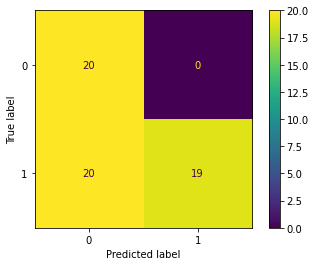

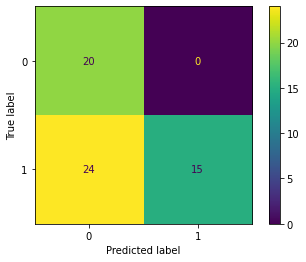

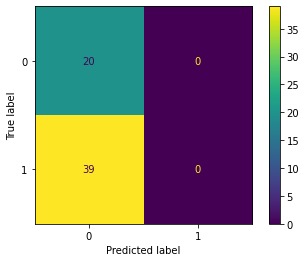

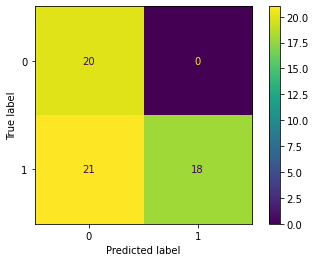

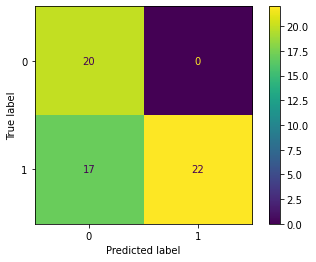

In [377]:
for algorithm in metrics.values():
    index = next(index for index, x in enumerate(algorithm['fpr']) if x != 0)
    print(algorithm['name'])
    cm = confusion_matrix(algorithm['y_real'], algorithm['y_pred'] >= algorithm['thresholds'][index-1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()